In the NAIP data chapter in this textbook, you learned how to import a multi-band image into Python using rioxarray. You then plotted the data as a composite, RGB (and CIR) image using imshow() and calculated NDVI.

In that case, all bands of the data were stored in a single .tif file. However, sometimes data are downloaded in individual bands rather than a single file.

In this chapter, you will learn how to work with Landsat data in Python. Each band in a landsat scene is often stored in an individual .tif file. Thus you will need to grab the bands that you want to work with and then bring them into a xarrray DataFrame.

About Landsat Data
At over 40 years, the Landsat series of satellites provides the longest temporal record of moderate resolution multispectral data of the Earth’s surface on a global basis. The Landsat record has remained remarkably unbroken, proving a unique resource to assist a broad range of specialists in managing the world’s food, water, forests, and other natural resources for a growing world population. It is a record unmatched in quality, detail, coverage, and value. Source: USGS

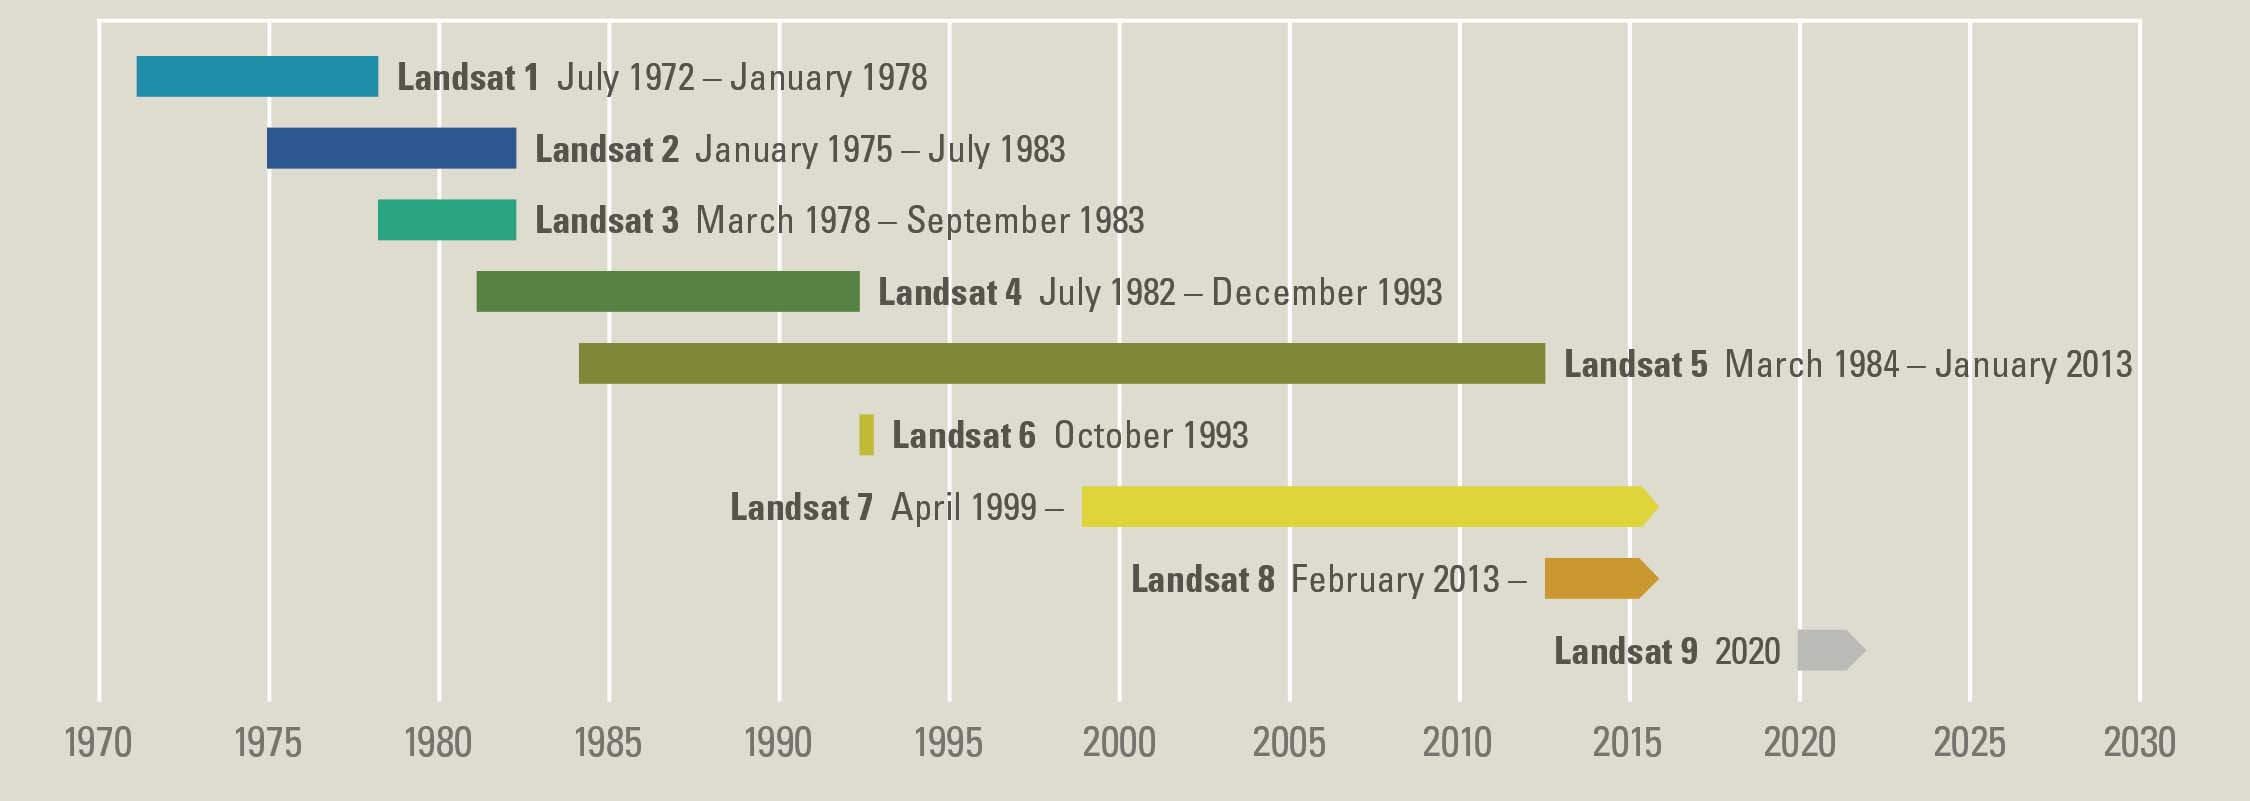

Landsat data are spectral and collected using a platform mounted on a satellite in space that orbits the earth. The spectral bands and associated spatial resolution of the first 9 bands in the Landsat 8 sensor are listed below.

Landsat 8 Bands

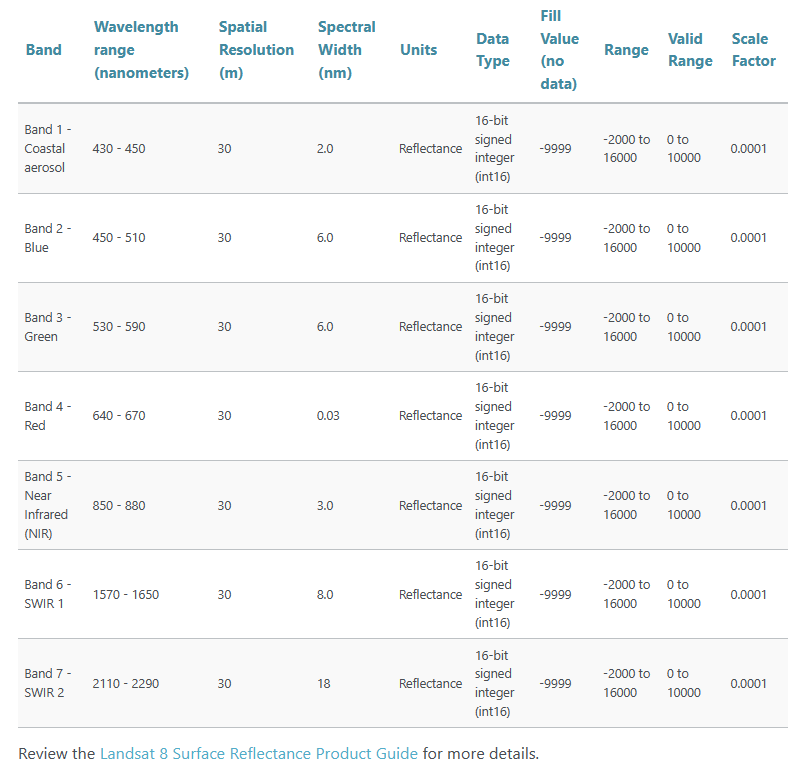

There are additional collected bands that are not distributed within the Landsat 8 Surface Reflectance Product such as the panchromatic band, which provides a finer resolution, gray scale image of the landscape, and the cirrus cloud band, which is used in the quality assessment process:

Band	Wavelength range (nanometers)	Spatial Resolution (m)	Spectral Width (nm)
Band 8 - Panchromatic	500 - 680	15	18
Band 9 - Cirrus	1360 - 1380	30	2.0
Understand Landsat Data
When working with landsat, it is important to understand both the metadata and the file naming convention. The metadata tell you how the data were processed, where the data are from and how they are structured.

The file names, tell you what sensor collected the data, the date the data were collected, and more.

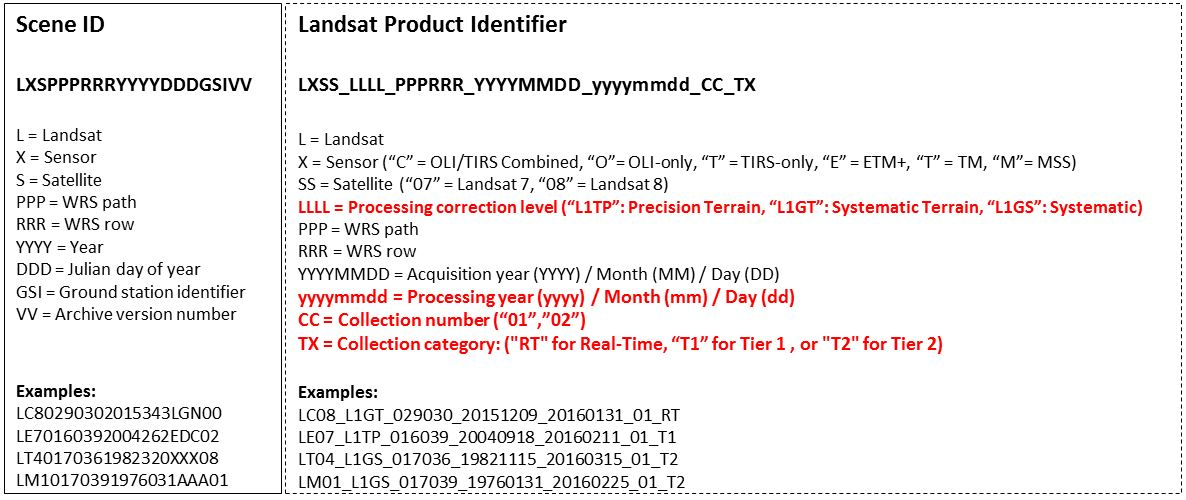

Landsat File Naming Convention
Landsat and many other satellite remote sensing data is named in a way that tells you a about:

When the data were collected and processed
What sensor was used to collect the data
What satellite was used to collect the data.
And more.

Here you will learn a few key components of the landsat 8 collection file name. The first scene that you work with below is named:

LC080340322016072301T1-SC20180214145802

First, we have LC08

L: Landsat Sensor
C: OLI / TIRS combined platform
08: Landsat 8 (not 7)

034032: The next 6 digits represent the path and row of the scene. This identifies the spatial coverage of the scene
Finally, you have a date. In your case as follows:

20160723: representing the year, month and day that the data were collected.
The second part of the file name above tells you more about when the data were last processed. You can read more about this naming convention using the link below.

Learn more about Landsat 8 file naming conventions.

As you work with these data, it is good to double check that you are working with the sensor (Landsat 8) and the time period that you intend. Having this information in the file name makes it easier to keep track of this as you process your data.

In [ ]:
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# Download data and set working directory
data = et.data.get_data("cold-springs-fire")
os.chdir(os.path.join(et.io.HOME, 
                      "earth-analytics", 
                      "data"))